# Predicting Medical Insurance Premiums
### In this project, we will be creating a model to predict health insurance premiums for customers.


### Imports 

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

# Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Data

In [38]:
# loading the data
premiums = pd.read_csv('Medicalpremium.csv')
premiums.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


* Age: customer age
* Diabetes: Whether or not the person has diabetes
* BloodPressureProblems: High blood pressure or not
* AnyTransplants: if the cutomer has had a transplant or not 
* AnyChronicDiseases: Whtehr or not the cutoemr suffers from a chronic disease
* Height: customer height 
* Weight: customer weight
* KnownAllergies: whether or not the customer has any known allergies
* HistoryOfCancerInFamily: customer's history of cancer in family 
* NumberOfMajorSurgeries: # of major surgeries
* PremiumPrice: yearly premium price


In [39]:
premiums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [40]:
premiums.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [41]:
# checking for Nulls 
premiums.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

### Data Exploration

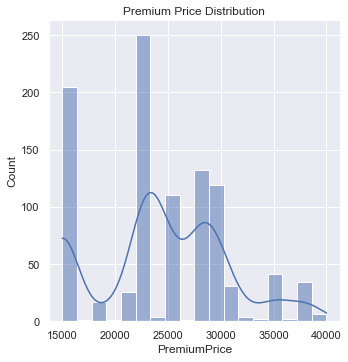

In [42]:
# DISTRIBUTION OF PREMIUM PRICES
sns.displot(x= 'PremiumPrice', data = premiums, kde= True)
plt.title('Premium Price Distribution')
plt.show()

As we can see, it is difficult to describe the distribution of premium prices. Although we do see signifcant peaks at around 15000 annd 22500. 

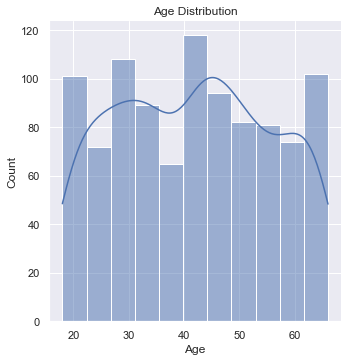

In [43]:
# DISTRIBUTION OF Age
sns.displot(x= 'Age', data = premiums, kde= True)
plt.title('Age Distribution')
plt.show()

As we can see, it is difficult to describe the distribution of premium prices. Although we do see signifcant peaks at around 15000 annd 22500. 

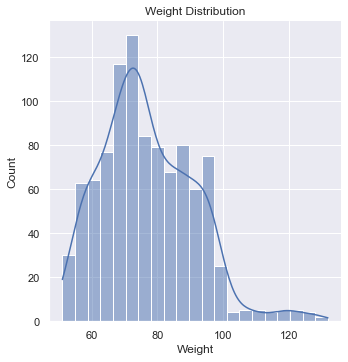

In [44]:
# DISTRIBUTION OF Age
sns.displot(x= 'Weight', data = premiums, kde= True)
plt.title('Weight Distribution')
plt.show()

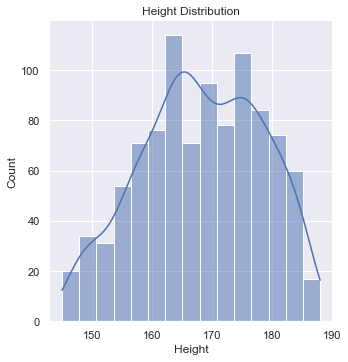

In [45]:
# DISTRIBUTION OF Age
sns.displot(x= 'Height', data = premiums, kde= True)
plt.title('Height Distribution')
plt.show()

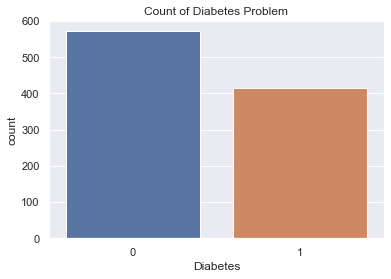

In [46]:
# diabetes count
sns.countplot(x='Diabetes', data = premiums)
plt.title('Count of Diabetes Problem')
plt.show()

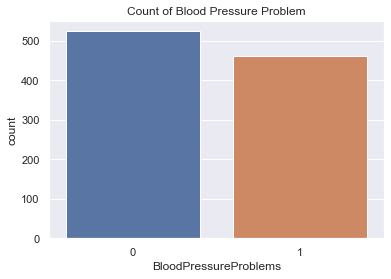

In [47]:
# Count of Blood Pressure Problems
sns.countplot(x= 'BloodPressureProblems', data = premiums)
plt.title('Count of Blood Pressure Problem')
plt.show()

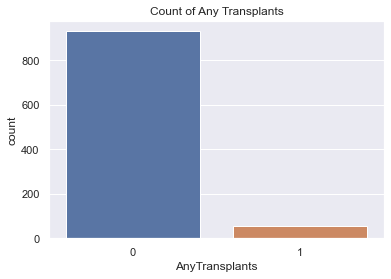

In [48]:
# Count of Any Transplants
sns.countplot(x= 'AnyTransplants', data = premiums)
plt.title('Count of Any Transplants')
plt.show()

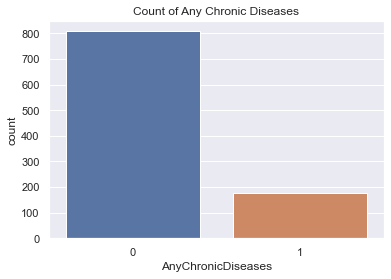

In [49]:
# Count of Any Chronic Diseases
sns.countplot(x= 'AnyChronicDiseases', data = premiums)
plt.title('Count of Any Chronic Diseases')
plt.show()

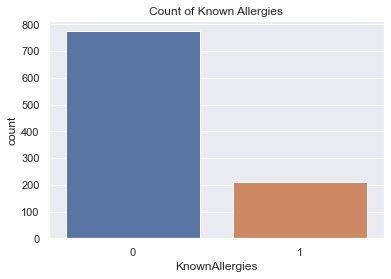

In [50]:
# Count of Known Allergies
sns.countplot(x= 'KnownAllergies', data = premiums)
plt.title('Count of Known Allergies')
plt.show()

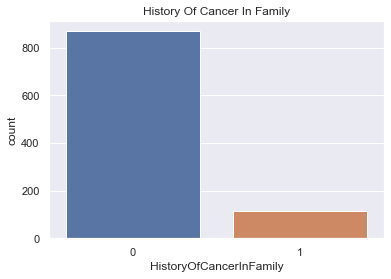

In [51]:
# History Of Cancer In Family
sns.countplot(x= 'HistoryOfCancerInFamily', data = premiums)
plt.title('History Of Cancer In Family')
plt.show()

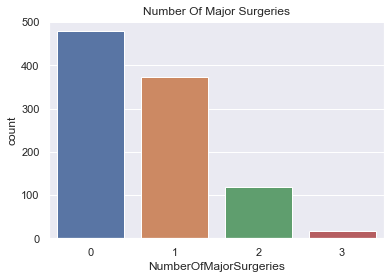

In [52]:
# Count of Number Of Major Surgeries
sns.countplot(x= 'NumberOfMajorSurgeries', data = premiums)
plt.title('Number Of Major Surgeries')
plt.show()

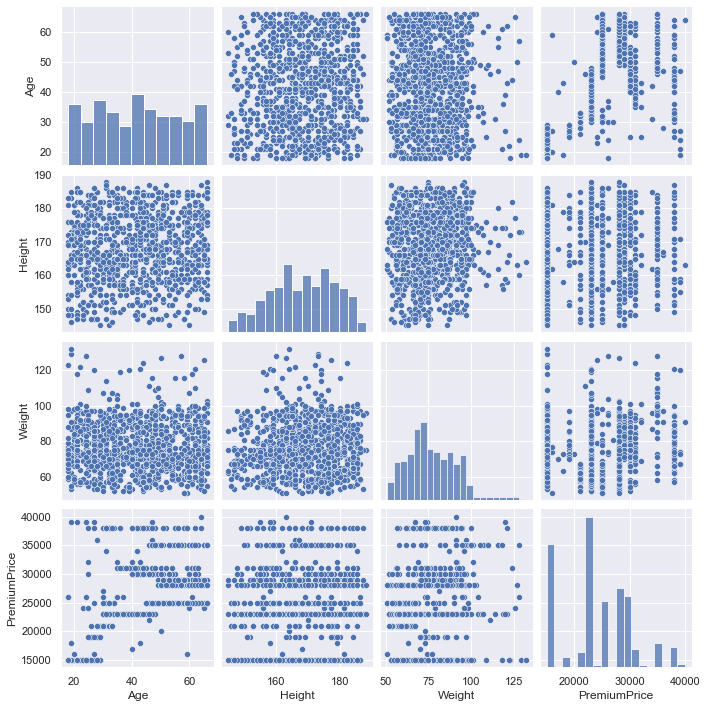

In [53]:
# scatter plots
pairs = premiums[['Age', 'Height', 'Weight','PremiumPrice']]
sns.pairplot(pairs)

Now lets take a look at a heat map our data.

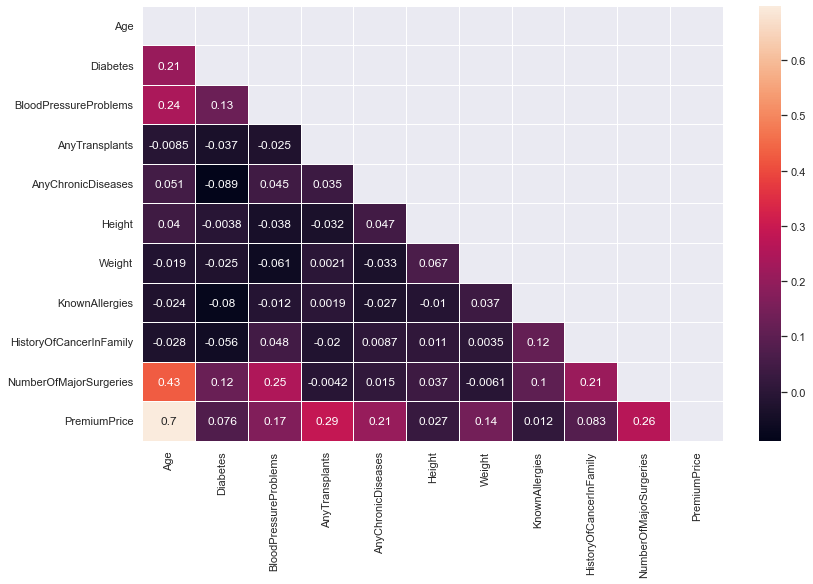

In [63]:
plt.figure(figsize= (13,8))
mask = np.zeros_like(premiums.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(premiums.corr(), mask=mask, annot=True, linewidths = .01)

From the heat map, the variable with the strongest correlation to the Premium Price is age. Age has by far the biggest influence on premium price. Other influetial variables are transplant, number of surgeries, and chronic disease history. 

## Model

In [65]:
premiums.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

### Defining X and y 

In [82]:
X = premiums[['Age', 'Diabetes', 'BloodPressureProblems','AnyTransplants','AnyChronicDiseases','Height','Weight',
              'KnownAllergies','HistoryOfCancerInFamily','NumberOfMajorSurgeries']]
y = premiums['PremiumPrice']

### Training and Test Data

In [114]:
# splitting up data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state= 5)

### Training Our Model

In [115]:
lm = LinearRegression()

In [116]:
lm.fit(X_train, y_train)

LinearRegression()

In [117]:
lm.coef_

array([ 327.20764693, -571.79856704,  266.94960138, 8513.78750597,
       2656.28437032,  -10.9303608 ,   74.10823937,  326.66289288,
       2387.03205052, -665.70764981])

In [118]:
df = pd.DataFrame(data = lm.coef_, columns = ['Coefficient'], index = X_train.columns)
df.head()

,Coefficient
Age,327.207647
Diabetes,-571.798567
BloodPressureProblems,266.949601
AnyTransplants,8513.787506
AnyChronicDiseases,2656.284370


### Making Predictions

In [119]:
y_predictions = lm.predict(X_test)

### Evaluation

In [120]:
r2= r2_score(y_test, y_predictions)
r2

0.6714256128558256

Our initial model is predicting at just over 67%.

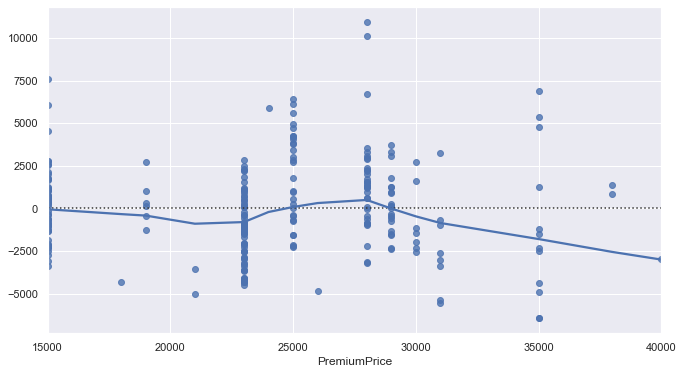

In [121]:
plt.figure(figsize =(11,6))
sns.residplot(x=y_test, y=y_predictions, lowess=True)

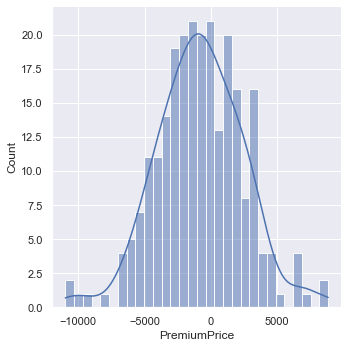

In [122]:
sns.displot((y_test-y_predictions), bins = 30, kde=True)